# 1. VGG-16 Architecture
* 13 Convolution Layer + 3 Fully-connected Layer
* 3x3 Convolution filters
* Stride=1 & Padding=1
* 2x2 Max pooling (Stride=2)
* ReLu

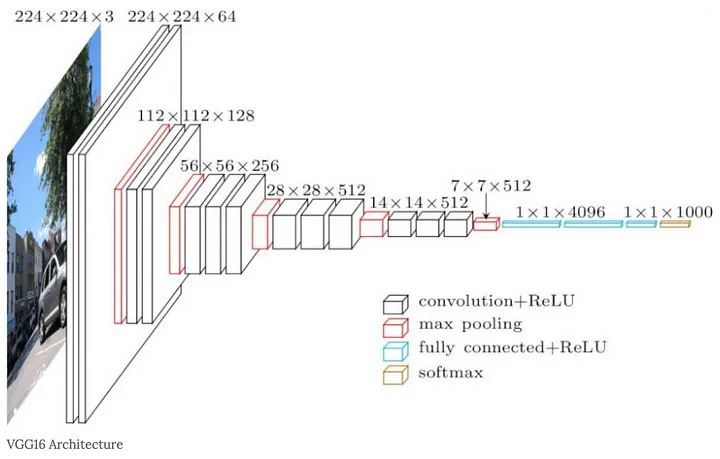


* 신경망의 마지막 3 Fully-Connected Layer는 각각 4096, 4096, 1000개의 유닛으로 구성
* 출력층(class의 수 : 1000)은 classification을 위한 Softmax 함수를 사용

# 2. 3x3 Convolutional Layer
* VGG 모델 이전의 Convolutional Network는 비교적 큰 Receptive Field(수용 영역)를 갖는 11x11, 7x7 filter 이용
* 3x3의 작은 필터 이용은 정확도를 크게 향상시켰다. 이 부분에서 좋은 통찰을 얻을 수 있다.
---

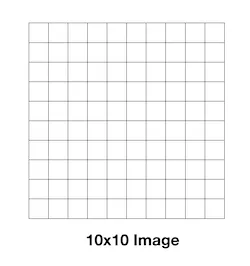
### **예를 들어, 10x10 이미지가 있을 때 7x7, 3x3 필터로 각각 Convolution을 수행하면 다음과 같은 특성이 있다.**


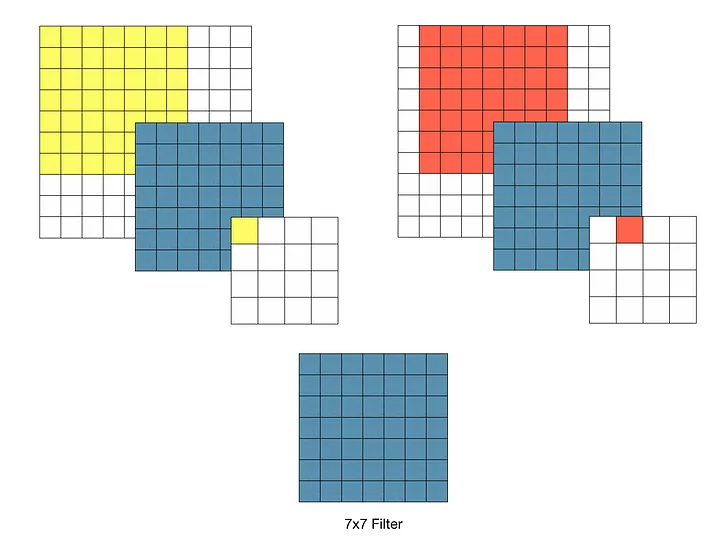
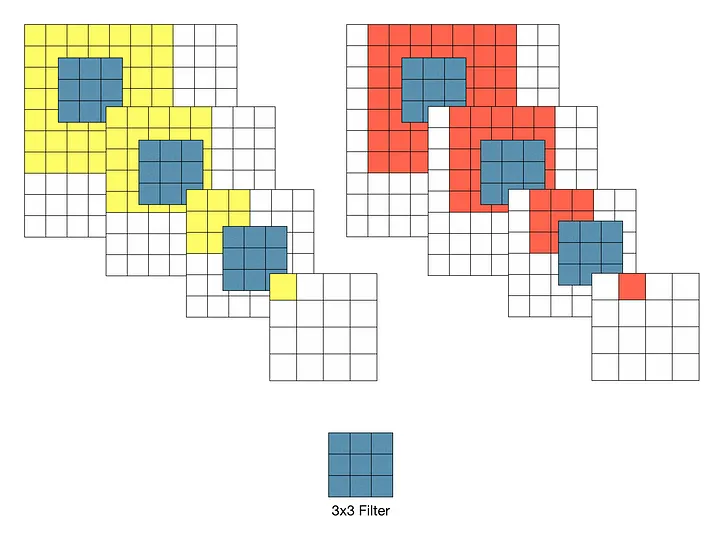

### <span style="color: #2D3748; background-color:#fff5b1;">**Stride = 1일 때, 3차례의 3x3 Conv 필터링을 반복한 특징맵은 한 픽셀이 원본 이미지의 7x7 Receptive Field의 효과를 볼 수 있다.**</span>


### 7x7 필터를 이용해 이미지에 대해 한 번 Convolution을 수행한 것과 3x3 필터로 세 번 Convolution을 수행한 것에는 어떤 차이가 있을까?
1. 결정 함수의 비선형성 증가
    * Convolution 연산은 ReLu 함수를 포함한다. 1-Layer 7x7 필터의 경우 한 번의 비선형 함수가 적용되는 반면 3-Layer 3x3 필터링은 세 번의 비선형 함수가 적용되어 <U>레이어가 증가함에 따라 비선형성이 증가하게 되고 이것은 모델의 특징 식별성 증가로 이어진다.</U>
2. 학습 파라미터 수의 감소
    * Convolutional Network 구조를 학습할 때, 학습 대상인 가중치(weight)는 필터의 크기에 해당한다.
    * 따라서, <U>7x7필터 1개에 대한 학습 파라미터 수는 49이고 3x3 필터 3개에 대한 학습 파라미터 수는 27(3x3x3)이 된다.</U>

# 3. 가중치 초기화
* 초기 가중치가 너무 크거나 작으면, Activation Fuction에 의해 신호가 증폭되거나 소멸되어 학습이 제대로 이루어지지 않을 수 있다.
* <span style="color: #2D3748; background-color:#fff5b1;">정규분포를 따르는 값으로 초기화</span>하면 각 가중치가 적절한 크기를 가지게 되어, 역전파 과정에서 Gradient Exploding, Vanishing 문제를 줄일 수 있다.

# 4. 학습 이미지 크기
* 모델 학습시 입력 이미지의 크기는 모두 224x224로 고정
* 학습 이미지는 각 이미지에 대해 256x256~512x512 내에서 임의의 크기로 변환하고, <span style="color: #2D3748; background-color:#fff5b1;">크기가 변환된 이미지에서 개체(Object)의 일부가 포함된 224x224 이미지를 Crop하여 사용하였다</span>

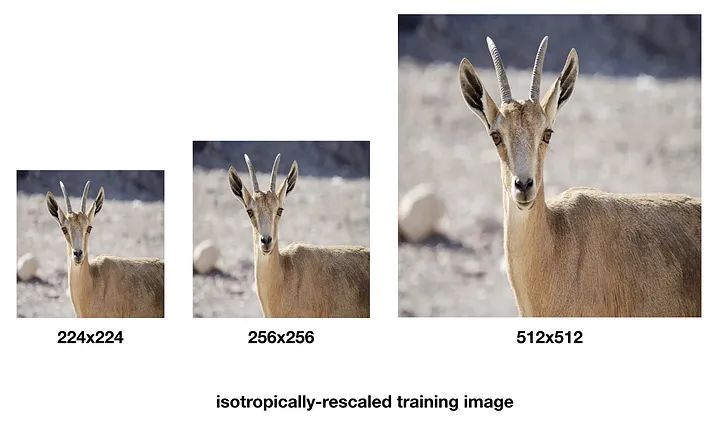
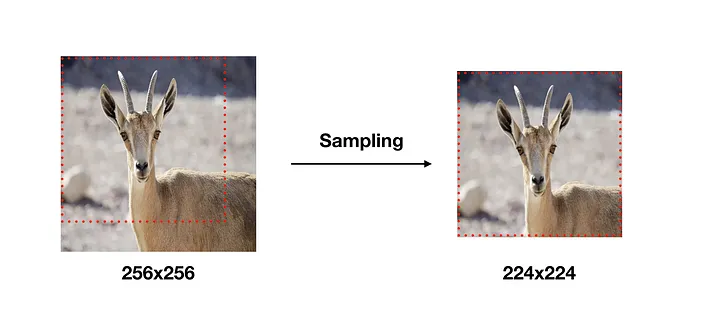
* ### 이미지를 256x256 크기로 변환 후 224x224 크기를 샘플링한 경우
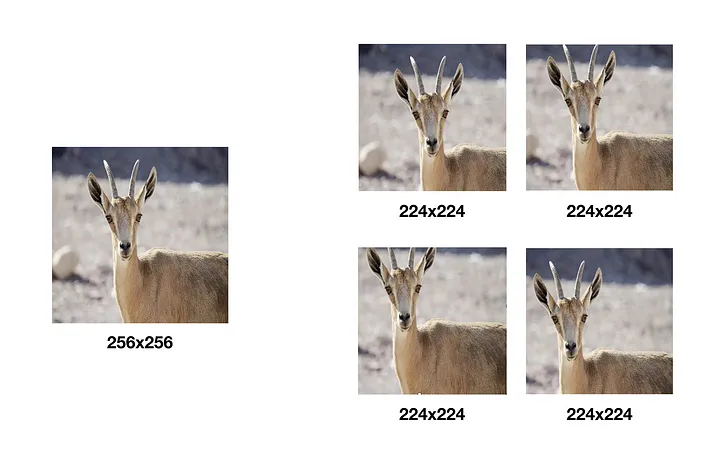
* ### 이미지를 512x512 크기로 변환 후 224x224 크기를 샘플링한 경우
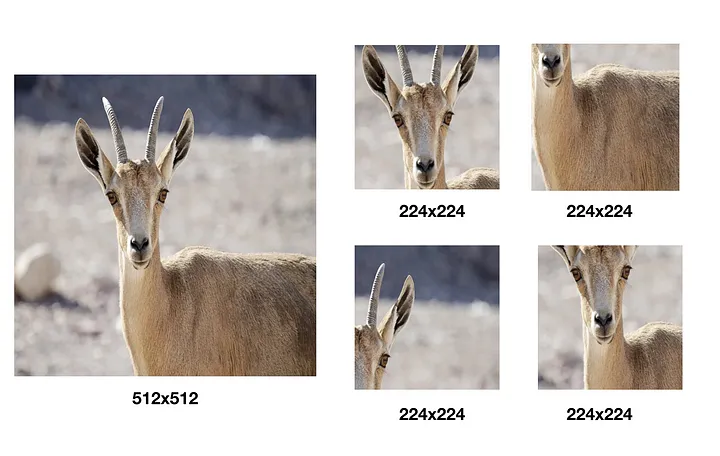


### 이처럼 학습 데이터를 다양한 크기로 변환하고 그 중 일부분을 샘플링해 사용
* 한정적인 데이터의 수를 늘릴 수 있다.
* <span style="color: #2D3748; background-color:#fff5b1;">하나의 오브젝트에 대한 다양한 측면을 학습 시 반영시킬 수 있다.</span> 변환된 이미지가 작을수록 개체의 전체적인 측면을 학습할 수 있고, 변환된 이미지가 클수록 개체의 특정한 부분을 학습에 반영할 수 있다.
<br>  
<br>
<br>
실제로 VGG 연구팀의 실험 결과에 따르면 다양한 스케일로 변환한 이미지에서 샘플링하여 학습 데이터로 사용한 경우가 단일 스케일 이미지에서 샘플링한 경우보다 분류 정확도가 좋았다.

# 5. Fully-convolutional Network
* 신경망의 마지막 3 Fully-Connected layers를 Convolutional layers로 변환하여 사용
* 첫 번째 Fully-Connected layer는 7x7 Conv로, 마지막 두 Fully-Connected layer는 1x1 Conv로 변환하였다. 이런식으로 변환된 신경망을 Fully-Convolutional Networks라 부른다.
* https://arxiv.org/pdf/1411.4038